### Import Libraries

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("D:\Imarticus\Datasets\Taxi Fare Prediction\Dataset\TaxiFare.csv")
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


### EDA

In [3]:
df.shape

(50000, 8)

In [4]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [5]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [6]:
df.describe(include = "all")

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,3597,NaN,49555,NaN,NaN,NaN,NaN,NaN
top,26:00.0,NaN,2011-09-03 01:30:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,457,NaN,3,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.364171,NaN,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,NaN,9.685557,NaN,10.393860,6.224857,10.407570,6.014737,1.289195
min,NaN,-5.000000,NaN,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,NaN,6.000000,NaN,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,NaN,8.500000,NaN,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,NaN,12.500000,NaN,-73.967148,40.767360,-73.963584,40.768167,2.000000


In [7]:
num_columns = list(df.select_dtypes(exclude = "O"))
num_columns

['amount',
 'longitude_of_pickup',
 'latitude_of_pickup',
 'longitude_of_dropoff',
 'latitude_of_dropoff',
 'no_of_passenger']

<AxesSubplot:>

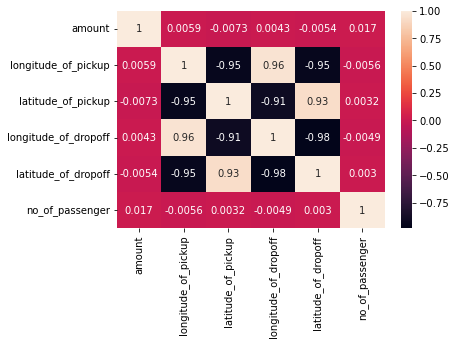

In [8]:
sns.heatmap(data = df[num_columns].corr(), annot = True)

In [9]:
X1 = df["longitude_of_pickup"]
X2 = df["longitude_of_dropoff"]
Y1 = df["latitude_of_pickup"]
Y2 = df["latitude_of_dropoff"]

In [10]:
df["Distance_travelled"] = np.nan  # create a new column to calculate distance travelled
df["Distance_travelled"] = np.sqrt(((X1 - X2)**2) + ((Y1 -Y2)**2)) # formula to calculate the distance travelled
df["Distance_travelled"]

0        0.009436
1        0.079696
2        0.013674
3        0.025340
4        0.019470
           ...   
49995    0.045782
49996    0.008049
49997    0.020574
49998    0.007686
49999    0.000000
Name: Distance_travelled, Length: 50000, dtype: float64

In [11]:
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Distance_travelled
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.009436
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.079696
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.013674
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.025340
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.019470
...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1,0.045782
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1,0.008049
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1,0.020574
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2,0.007686


In [12]:
# splitting date_time_of_pickup column into three columns
df[["date", "time", "zone"]] = df['date_time_of_pickup'].str.split(expand=True)
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Distance_travelled,date,time,zone
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.009436,2009-06-15,17:26:21,UTC
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.079696,2010-01-05,16:52:16,UTC
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.013674,2011-08-18,00:35:00,UTC
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.025340,2012-04-21,04:30:42,UTC
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.019470,2010-03-09,07:51:00,UTC
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1,0.045782,2013-06-12,23:25:15,UTC
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1,0.008049,2015-06-22,17:19:18,UTC
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1,0.020574,2011-01-30,04:53:00,UTC
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2,0.007686,2012-11-06,07:09:00,UTC


In [13]:
# dropping unwanted columns
df.drop(["unique_id", "date_time_of_pickup", "zone", "longitude_of_pickup",
         "latitude_of_pickup", "longitude_of_dropoff", "latitude_of_dropoff"], axis = 1, inplace = True)
df

,amount,no_of_passenger,Distance_travelled,date,time
0,4.5,1,0.009436,2009-06-15,17:26:21
1,16.9,1,0.079696,2010-01-05,16:52:16
2,5.7,2,0.013674,2011-08-18,00:35:00
3,7.7,1,0.025340,2012-04-21,04:30:42
4,5.3,1,0.019470,2010-03-09,07:51:00
...,...,...,...,...,...
49995,15.0,1,0.045782,2013-06-12,23:25:15
49996,7.5,1,0.008049,2015-06-22,17:19:18
49997,6.9,1,0.020574,2011-01-30,04:53:00
49998,4.5,2,0.007686,2012-11-06,07:09:00


In [14]:
# dropping rows where amount is less than zero
df.drop(df[df.amount < 0].index, inplace =True )
df

,amount,no_of_passenger,Distance_travelled,date,time
0,4.5,1,0.009436,2009-06-15,17:26:21
1,16.9,1,0.079696,2010-01-05,16:52:16
2,5.7,2,0.013674,2011-08-18,00:35:00
3,7.7,1,0.025340,2012-04-21,04:30:42
4,5.3,1,0.019470,2010-03-09,07:51:00
...,...,...,...,...,...
49995,15.0,1,0.045782,2013-06-12,23:25:15
49996,7.5,1,0.008049,2015-06-22,17:19:18
49997,6.9,1,0.020574,2011-01-30,04:53:00
49998,4.5,2,0.007686,2012-11-06,07:09:00


In [15]:
df.dtypes

amount                float64
no_of_passenger         int64
Distance_travelled    float64
date                   object
time                   object
dtype: object

In [16]:
# creating a new column named session and values from 1 - 6 is assigned for every 4 hours
df['time'] = pd.to_datetime(df['time'], errors='coerce')
df['Session'] = (df['time'].dt.hour % 24 + 4) // 4
df['Session'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)
df

,amount,no_of_passenger,Distance_travelled,date,time,Session
0,4.5,1,0.009436,2009-06-15,2022-03-16 17:26:21,Evening
1,16.9,1,0.079696,2010-01-05,2022-03-16 16:52:16,Evening
2,5.7,2,0.013674,2011-08-18,2022-03-16 00:35:00,Late Night
3,7.7,1,0.025340,2012-04-21,2022-03-16 04:30:42,Early Morning
4,5.3,1,0.019470,2010-03-09,2022-03-16 07:51:00,Early Morning
...,...,...,...,...,...,...
49995,15.0,1,0.045782,2013-06-12,2022-03-16 23:25:15,Night
49996,7.5,1,0.008049,2015-06-22,2022-03-16 17:19:18,Evening
49997,6.9,1,0.020574,2011-01-30,2022-03-16 04:53:00,Early Morning
49998,4.5,2,0.007686,2012-11-06,2022-03-16 07:09:00,Early Morning


In [17]:
# one hot encoding 
df = pd.get_dummies(df, columns=['Session'], drop_first = True)
df.sample(10)

,amount,no_of_passenger,Distance_travelled,date,time,Session_Evening,Session_Late Night,Session_Morning,Session_Night,Session_Noon
2055,7.3,1,0.015937,2010-06-24,2022-03-16 20:26:38,0,0,0,1,0
4145,9.7,1,0.022193,2009-06-10,2022-03-16 11:24:14,0,0,1,0,0
2281,9.3,5,0.000000,2011-08-29,2022-03-16 08:24:00,0,0,1,0,0
3142,6.5,1,0.018724,2013-01-02,2022-03-16 13:38:09,0,0,0,0,1
15723,17.0,5,0.043650,2014-09-26,2022-03-16 18:29:00,1,0,0,0,0
24461,9.3,2,0.000000,2009-12-01,2022-03-16 21:56:17,0,0,0,1,0
1602,8.5,1,0.020010,2014-11-06,2022-03-16 07:32:30,0,0,0,0,0
19297,8.9,3,0.038240,2010-12-22,2022-03-16 20:06:00,0,0,0,1,0
37027,10.5,1,0.016841,2010-04-07,2022-03-16 15:24:06,0,0,0,0,1
34556,7.3,3,0.026039,2012-01-28,2022-03-16 21:53:00,0,0,0,1,0


In [18]:
# splitting date column into three columns
df[["year", "month", "day"]] = df['date'].str.split('-', expand=True)
df

,amount,no_of_passenger,Distance_travelled,date,time,Session_Evening,Session_Late Night,Session_Morning,Session_Night,Session_Noon,year,month,day
0,4.5,1,0.009436,2009-06-15,2022-03-16 17:26:21,1,0,0,0,0,2009,06,15
1,16.9,1,0.079696,2010-01-05,2022-03-16 16:52:16,1,0,0,0,0,2010,01,05
2,5.7,2,0.013674,2011-08-18,2022-03-16 00:35:00,0,1,0,0,0,2011,08,18
3,7.7,1,0.025340,2012-04-21,2022-03-16 04:30:42,0,0,0,0,0,2012,04,21
4,5.3,1,0.019470,2010-03-09,2022-03-16 07:51:00,0,0,0,0,0,2010,03,09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,15.0,1,0.045782,2013-06-12,2022-03-16 23:25:15,0,0,0,1,0,2013,06,12
49996,7.5,1,0.008049,2015-06-22,2022-03-16 17:19:18,1,0,0,0,0,2015,06,22
49997,6.9,1,0.020574,2011-01-30,2022-03-16 04:53:00,0,0,0,0,0,2011,01,30
49998,4.5,2,0.007686,2012-11-06,2022-03-16 07:09:00,0,0,0,0,0,2012,11,06


In [19]:
# using day, month and year we find whether the day was a weekday or not
dates = pd.to_datetime({"year": df.year, "month": df.month, "day": df.day})
df["Is Weekend"] = dates.dt.day_name().isin(['Saturday', 'Sunday'])
df

,amount,no_of_passenger,Distance_travelled,date,time,Session_Evening,Session_Late Night,Session_Morning,Session_Night,Session_Noon,year,month,day,Is Weekend
0,4.5,1,0.009436,2009-06-15,2022-03-16 17:26:21,1,0,0,0,0,2009,06,15,False
1,16.9,1,0.079696,2010-01-05,2022-03-16 16:52:16,1,0,0,0,0,2010,01,05,False
2,5.7,2,0.013674,2011-08-18,2022-03-16 00:35:00,0,1,0,0,0,2011,08,18,False
3,7.7,1,0.025340,2012-04-21,2022-03-16 04:30:42,0,0,0,0,0,2012,04,21,True
4,5.3,1,0.019470,2010-03-09,2022-03-16 07:51:00,0,0,0,0,0,2010,03,09,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,15.0,1,0.045782,2013-06-12,2022-03-16 23:25:15,0,0,0,1,0,2013,06,12,False
49996,7.5,1,0.008049,2015-06-22,2022-03-16 17:19:18,1,0,0,0,0,2015,06,22,False
49997,6.9,1,0.020574,2011-01-30,2022-03-16 04:53:00,0,0,0,0,0,2011,01,30,True
49998,4.5,2,0.007686,2012-11-06,2022-03-16 07:09:00,0,0,0,0,0,2012,11,06,False


In [20]:
df.drop(["date", "time", "year", "month", "day"], axis = 1, inplace = True)
df

,amount,no_of_passenger,Distance_travelled,Session_Evening,Session_Late Night,Session_Morning,Session_Night,Session_Noon,Is Weekend
0,4.5,1,0.009436,1,0,0,0,0,False
1,16.9,1,0.079696,1,0,0,0,0,False
2,5.7,2,0.013674,0,1,0,0,0,False
3,7.7,1,0.025340,0,0,0,0,0,True
4,5.3,1,0.019470,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...
49995,15.0,1,0.045782,0,0,0,1,0,False
49996,7.5,1,0.008049,1,0,0,0,0,False
49997,6.9,1,0.020574,0,0,0,0,0,True
49998,4.5,2,0.007686,0,0,0,0,0,False


<AxesSubplot:>

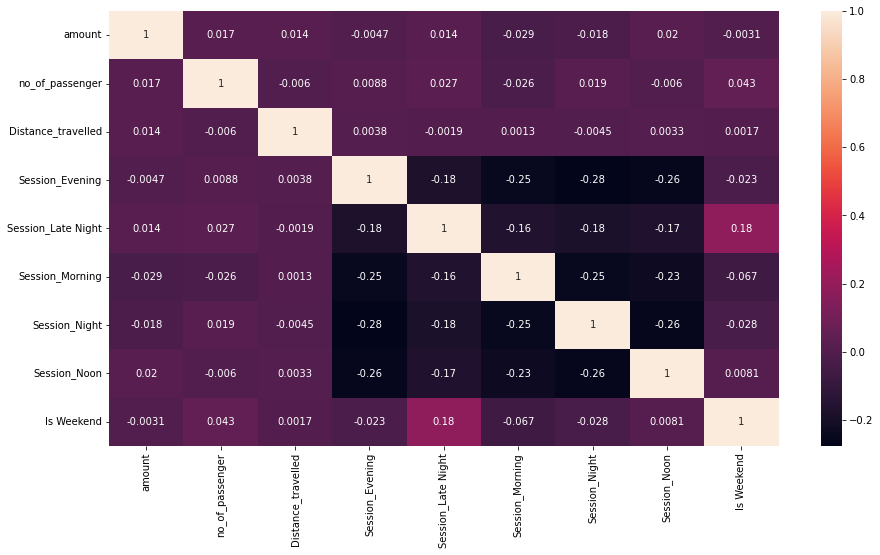

In [21]:
plt.figure(figsize = (15, 8))
sns.heatmap(data = df.corr(), annot = True)

In [22]:
# one hot encoding
df = pd.get_dummies(df, columns=['Is Weekend'], drop_first = True)
df.sample(10)

,amount,no_of_passenger,Distance_travelled,Session_Evening,Session_Late Night,Session_Morning,Session_Night,Session_Noon,Is Weekend_True
48040,14.9,3,0.045033,0,1,0,0,0,1
38555,4.5,1,0.005352,0,1,0,0,0,1
37436,9.7,2,0.033873,0,0,1,0,0,0
8476,6.9,1,0.021086,0,0,0,0,0,0
13102,52.0,1,0.228893,0,0,0,0,1,0
38382,17.3,3,0.059416,0,0,1,0,0,0
6451,15.0,1,0.042143,0,1,0,0,0,1
33223,15.7,2,0.067564,0,1,0,0,0,1
10433,12.9,1,0.057460,0,1,0,0,0,1
11767,10.1,2,0.026978,0,0,0,0,1,0


### Splitting and Scaling Data

In [23]:
scaler = MinMaxScaler()
x = df.drop("amount", axis = 1)
X = scaler.fit_transform(x)
Y = df["amount"]
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

## Trying Different approaches

### Linear Regression

In [24]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [25]:
model.score(X_train, Y_train)

0.0031777900938187997

In [26]:
model.score(X_test, Y_test)

0.001864679533543634

### Polynomial Regression

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, Y_train)

y_pred = poly_clf.predict(X_test2)

print(poly_clf.score(X_train2, Y_train))

0.004549937892457168


In [28]:
print(poly_clf.score(X_test2, Y_test))

0.002464256312744051


### Decision Tree

In [29]:
dTree = DecisionTreeRegressor()
dTree.fit(X_train, Y_train)

DecisionTreeRegressor()

In [30]:
print(dTree.score(X_train, Y_train))
print(dTree.score(X_test, Y_test))

0.8614546932014803
0.6035536877952363


### Random Forest

In [31]:
regressor = RandomForestRegressor(n_estimators = 500, random_state = 0)

In [32]:
regressor.fit(X_train, Y_train)
regressor.score(X_train,Y_train)*100

84.61696716744045

In [33]:
regressor.fit(X_test, Y_test)
regressor.score(X_test,Y_test)*100

88.84447488812309